In [1]:
import warnings
warnings.filterwarnings('ignore')
import opendatasets as od
import os
import random
import pickle
import mediapipe as mp
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
data_dir = 'sign-lang-img-dataset/' 

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(min_detection_confidence=0.5, max_num_hands=1, static_image_mode=True)

In [4]:
class_names = os.listdir(data_dir)
class_names

['0', '1', '2', '3', '4']

In [5]:
features = [] #list to save all features (x,y,z) values
labels = [] #list to save all class values
#Itenerate through directories inside train dataset directory
try:
    for dir_name in range(len(class_names)):
        #Itenerate through all images
        for image in os.listdir(os.path.join(data_dir,str(dir_name))):
            data_aux = [] #list to temporarily contain 
            #read image
            img_path = os.path.join(data_dir, str(dir_name), image)
            image = cv2.flip(cv2.imread(img_path), 1)
            #get all the landmarks
            results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            if results.multi_hand_landmarks:
                for landmark in results.multi_hand_landmarks:
                    for i in range(len(landmark.landmark)):
                        x,y,z = landmark.landmark[i].x,landmark.landmark[i].y,landmark.landmark[i].z
                        data_aux.append(x)
                        data_aux.append(y)
                        data_aux.append(z)
                features.append(data_aux)
                labels.append(dir_name)
except Exception as e:
    print(e)

In [6]:
# Creation of a DataFrame for better data visualization and handling
df = pd.DataFrame(features).join(pd.DataFrame(labels), rsuffix='_')

In [7]:
# Visualize DataFrame
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,0_
0,0.360076,0.895951,6.684288e-07,0.298863,0.884158,-0.040095,0.250572,0.799328,-0.063815,0.281092,...,0.383866,0.511362,-0.094127,0.378037,0.440897,-0.108510,0.372709,0.374528,-0.118278,0
1,0.358369,0.894483,6.685729e-07,0.297909,0.880294,-0.038861,0.251305,0.795650,-0.062253,0.282012,...,0.383911,0.510338,-0.093609,0.378293,0.440527,-0.107730,0.372555,0.374705,-0.117457,0
2,0.370070,0.885321,6.197589e-07,0.311028,0.868210,-0.038964,0.266880,0.783436,-0.062102,0.299435,...,0.393883,0.504427,-0.087979,0.388715,0.436351,-0.100524,0.383943,0.372006,-0.109075,0
3,0.376171,0.875476,5.811212e-07,0.317087,0.858079,-0.036680,0.275422,0.769941,-0.057843,0.308792,...,0.399873,0.504566,-0.086444,0.394673,0.437703,-0.099556,0.389130,0.375539,-0.108444,0
4,0.382140,0.874965,5.568830e-07,0.325014,0.854910,-0.035928,0.283272,0.770076,-0.056859,0.315692,...,0.402654,0.502107,-0.079603,0.397907,0.437881,-0.089988,0.393246,0.377370,-0.097159,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.423840,0.750516,4.903825e-08,0.378069,0.717488,-0.020380,0.337908,0.657361,-0.037072,0.313477,...,0.446203,0.459480,-0.043524,0.444299,0.403821,-0.042729,0.442684,0.352787,-0.040887,4
496,0.423843,0.750989,5.253944e-08,0.378275,0.718341,-0.020797,0.337761,0.657352,-0.037361,0.312889,...,0.445933,0.460556,-0.042998,0.443901,0.405293,-0.041992,0.442342,0.354305,-0.039873,4
497,0.422103,0.745178,9.103450e-08,0.375552,0.714918,-0.021100,0.334749,0.654486,-0.037837,0.309447,...,0.442920,0.457107,-0.040966,0.441055,0.401596,-0.040207,0.440437,0.351868,-0.038250,4
498,0.420617,0.746872,6.767336e-08,0.374690,0.716579,-0.020289,0.334463,0.655675,-0.036447,0.309916,...,0.441882,0.457109,-0.042965,0.439966,0.401524,-0.042157,0.438905,0.350775,-0.040019,4


In [8]:
# Save Data Frame as csv
df.to_csv("hand_data.csv")

In [9]:
# Splitting data into input features and output features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(),y.to_numpy(),test_size=0.2,shuffle=True)

In [11]:
#Visualize arrays dimensions
X_train.shape,y_train.shape, y_test.shape, X_test.shape

((400, 63), (400,), (100,), (100, 63))

In [12]:
#Trainning a RandomForestClassifier Model
clf = RandomForestClassifier().fit(X_train, y_train)

Accuracy:100.00%


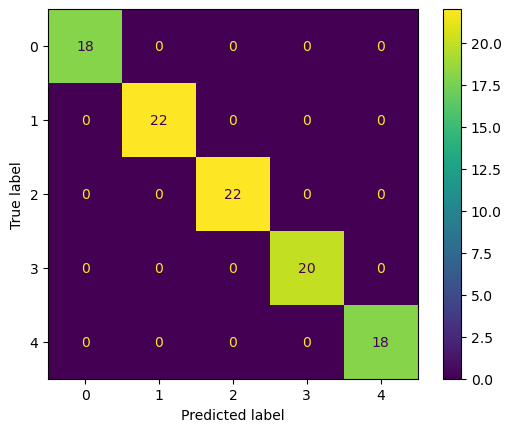

In [13]:
#Evaluate the model
print(f'Accuracy:{clf.score(X_test, y_test)*100:.2f}%')
model_preds = clf.predict(X_test)
cm = confusion_matrix(y_test, model_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
# Get a random sample, make preditions and plot the sample with the prediction made as title
random_class = random.choice(os.listdir(data_dir))
random_sample = random.choice(os.listdir(f'{data_dir}/{random_class}'))
img_path = os.path.join(f'{data_dir}/{random_class}/{random_sample}')
img = mpimg.imread(img_path)
sample = []
results_sample = hands.process(img)
if results_sample.multi_hand_landmarks:
    for landmark in results_sample.multi_hand_landmarks:
        data_aux= []
        for i in range(len(landmark.landmark)):
            x,y,z = landmark.landmark[i].x,landmark.landmark[i].y,landmark.landmark[i].z
            data_aux.append(x)
            data_aux.append(y)
            data_aux.append(z)
        sample.append(data_aux)
label = round(clf.predict(np.asarray(sample)).mean())
true_labels = {0: 'B',1: 'A',2: 'C',3: 'D',4: 'F'}
y_pred = true_labels[label]
plt.imshow(img)
plt.title(y_pred)
plt.show()

In [20]:
#Saving the model
with open('model.pkl','wb') as f:
    pickle.dump(clf, f)